**Judul** : Klasifikasi Kualitas Air Menggunakan Metode Pembelajaran Mesin KNearest Neighbour

**Nama**: Fadillah Zalsa Dira

**Nim** : A11.2022.14695

Proyek ini berfokus pada klasifikasi kualitas air untuk konsumsi menggunakan metode pembelajaran mesin, khususnya algoritma K-Nearest Neighbor (KNN). Kualitas air sangat penting bagi kehidupan sehari-hari dan di Indonesia, kualitas air masih menjadi masalah besar dengan banyak rumah tangga yang mengonsumsi air terkontaminasi. Penelitian ini bertujuan untuk mengembangkan sistem yang dapat mengklasifikasikan kualitas air dengan akurasi tinggi menggunakan algoritma KNN, serta membandingkan hasilnya dengan metode klasifikasi lainnya.

**Permasalahan Proyek**
Masalah utama yang dihadapi dalam proyek ini adalah kualitas air yang buruk di banyak provinsi di Indonesia. Banyak rumah tangga mengonsumsi air yang terkontaminasi, dan hanya sebagian kecil yang memiliki akses ke air minum yang aman. Oleh karena itu, diperlukan sistem yang dapat memantau dan menilai kualitas air secara akurat untuk mengidentifikasi masalah sejak dini.

**Tujuan Proyek**
1.   Mengembangkan sistem klasifikasi kualitas air menggunakan algoritma KNN.
2.   Membandingkan efektivitas metode KNN dengan metode klasifikasi lainnya.
3.   Memberikan wawasan mengenai potensi metode KNN dalam klasifikasi kualitas air.
4.   Membantu masyarakat dan pemerintah dalam mengambil tindakan pencegahan yang lebih efisien terkait polusi air dan masalah kualitas air lainnya.

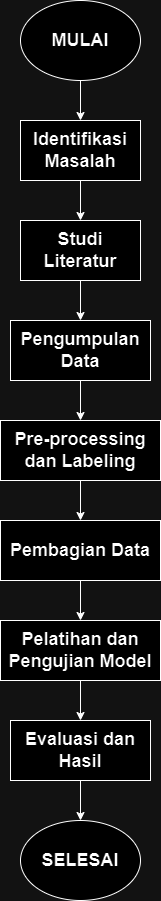

**IMPORTING LIBRARIES**

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**LOADING DATASET**

In [ ]:
Data = pd.read_csv('water_potability.csv')
df= pd.DataFrame(Data)
df

In [ ]:
df.columns

**EDA AND PREPROCESSING**

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Potability'].value_counts()

**Multivariate Analysis: Using Pairplots**

In [ ]:
sns.pairplot(df, hue="Potability", palette="husl",diag_kind="kde")
plt.show()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

**Correlation**

In [ ]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['Potability']].sort_values(by='Potability', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Potability', fontdict={'fontsize':18}, pad=16)

In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
df.fillna(df.mean(), inplace = True)
df

In [ ]:
df.isnull().sum()

**Data Visualization**

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = df['Potability'], data = df)
plt.title("Distribution of Unsafe and Safe Water")
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.7,rect.get_height(),horizontalalignment='center', fontsize = 15)

plt.tight_layout()
plt.show()

In [ ]:
df["Potability"].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(6, 4))
fig = px.pie(df, names="Potability")
fig.show()

In [ ]:
figure = px.histogram(df, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Hardness",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

In [ ]:
figure = px.histogram(df, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

# Water Quality Prediction:

1.  KNN Algorithm

In [ ]:
#df cols
x = pd.DataFrame(df, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']).values
y = df['Potability'].values.reshape(-1, 1) #Target variable
x

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [ ]:
K = 5
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

**Creat a For loop to find optimal K**

In [ ]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

In [ ]:
print(np.max(Acc))
print(np.min(Acc))

**try KNN for different k nearest neighbor from 1 to 30 through plotting**

In [ ]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

**According above codes and plot the optimal K is 18**

# **Improve Model**

**Apply GridSearchCV to optomize parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 31)}

# defining parameter range
grid_kn = GridSearchCV(estimator = knn, # Model
                       param_grid = parameters, # Range of K
                       scoring='accuracy',  # Evaluation on test set
                       cv=5, # Cross Validation
                       verbose = 1, # Time to calculate
                       n_jobs = -1) # Help to CPU  ====> For big dataset

# fitting the model for grid search
grid_kn.fit(x_train, y_train.ravel())

In [ ]:
grid_kn.best_params_

In [ ]:
grid_kn.best_score_

**Hasil**
Penelitian ini menunjukkan bahwa algoritma K-Nearest Neighbor (KNN) dapat digunakan dengan efektif untuk klasifikasi kualitas air. Beberapa langkah penting yang diambil dalam penelitian ini termasuk persiapan data, normalisasi data, pembagian data menjadi data pelatihan dan pengujian, serta pemilihan parameter K yang optimal. Dari hasil analisis, model KNN memberikan tingkat akurasi yang tinggi dalam klasifikasi kualitas air.

**Detail Hasil**
1. Data Training dan Testing: Data dibagi menjadi 70% untuk pelatihan dan 30% untuk pengujian, menghasilkan total 1456 data untuk pelatihan dan 625 data untuk pengujian.
2. Akurasi Model: Akurasi model yang dihasilkan dari data training dan testing mencapai 90.33% dengan tingkat akurasi maksimal ketika digunakan dengan perbandingan data training dan testing yang tepat.
3. Parameter K: Pemilihan parameter K yang optimal sangat penting dalam menentukan akurasi model KNN. Nilai K yang dipilih berdasarkan mayoritas label dari K tetangga terdekat.


**Kesimpulan**
Penelitian ini menyimpulkan bahwa teknik K-Nearest Neighbor (KNN) sangat efektif untuk klasifikasi kualitas air. Dengan akurasi mencapai 90.33%, model KNN dapat diandalkan untuk mengklasifikasikan data kualitas air yang baru tanpa label dengan hasil yang dapat dipercaya. Beberapa poin penting dari kesimpulan penelitian ini meliputi:

1. Efektivitas KNN: Algoritma KNN terbukti efektif dalam klasifikasi kualitas air dengan tingkat akurasi yang tinggi.
2. Pentingnya Preprocessing: Preprocessing data, termasuk normalisasi dan pembagian data, sangat penting untuk meningkatkan akurasi model.
3. Optimalisasi Parameter K: Pemilihan parameter K yang tepat sangat krusial dalam proses klasifikasi dengan KNN.

Dengan demikian, penelitian ini memberikan kontribusi signifikan dalam bidang klasifikasi kualitas air dan menawarkan solusi yang konkret untuk masalah kualitas air di Indonesia​